In [3]:
##Goal##
#To create a database for Joe that has the following for a specific date
#Is the Moon up (binary) during range 8:00pm to 4:00am? -- easy for single date/time, not sure how to push this through for example
#a year's worth 
#What is it's phase -- easy for single dates, not sure how to push this through for table of dates
#What is it's brightness (distance and amount illuminated) -- Can get distance easily (included in emphemeris)
#but NOT percent illuminated

##Idea is to have an example dataset with 1000 samples over one year

In [48]:

import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'
from __future__ import unicode_literals
import numpy as np
import scipy as sp
#from scipy import constants
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd


#import asciitable
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

from matplotlib.colors import LogNorm
import math
import glob
mp.rcParams['text.usetex']=False
#mp.rcParams['text.latex.unicode']=True
#rc('text', usetex=True)
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

from matplotlib.path import Path
import matplotlib.patches as patches

import asciitable


%matplotlib inline

In [ ]:
#Geocentric Celestial Reference System (GCRS).

#GCRS is distinct form ICRS mainly in that it is relative to the Earth’s center-of-mass rather than the solar system Barycenter. 
#That means this frame includes the effects of aberration (unlike ICRS). 
#For more background on the GCRS, see the references provided in the See Also section of the documentation. 
#(Of particular note is Section 1.2 of USNO Circular 179)

#This frame also includes frames that are defined relative to the Earth, but that are offset (in both position and velocity) from the Earth.

In [57]:
#prints out emphemeris data for the Moon obs from Perth
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon
t = Time("1985-12-20 23:22")
#utcoffset = 8*u.hour  # Eastern Daylight Time
#t = t+utcoffset
Perth = EarthLocation(lat=-31.9505*u.deg, lon=115.8605*u.deg, height=39*u.m)
#loc = EarthLocation.of_site('names') 
with solar_system_ephemeris.set('builtin'):
     moon = get_body('moon', t, Perth) 
        
moon

<SkyCoord (GCRS: obstime=1985-12-20 23:22:00.000, obsgeoloc=(-5201816.98415646, -1495618.7977058, -3362953.77387511) m, obsgeovel=( 109.06225548, -379.32252107,  0.) m / s): (ra, dec, distance) in (deg, deg, km)
    ( 19.19348204,  6.78775724,  408459.24467836)>

In [95]:
##Works and displays Moon's altitude at given date time (adjust for UTC difference)

import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
#moon = SkyCoord.from_name('Moon')

Perth = EarthLocation(lat=-31.9505*u.deg, lon=115.8605*u.deg, height=39*u.m)
utcoffset = 8*u.hour  # Eastern Daylight Time
#time = Time('1985-20-12 23:00:00') + utcoffset
t = Time("2018-5-10 23:55")#+ utcoffset
with solar_system_ephemeris.set('builtin'):
     moon = get_body('moon', t, loc)
print (moon)

moonaltaz = moon.transform_to(AltAz(obstime=t,location=Perth))  
"Moon's Altitude = {0.alt:.2}".format(moonaltaz)  

<SkyCoord (GCRS: obstime=2018-05-10 23:55:00.000, obsgeoloc=( 5177308.56844941, -1574107.30425019, -3364951.08284991) m, obsgeovel=( 114.78572831,  377.535339,  0.) m / s): (ra, dec, distance) in (deg, deg, km)
    ( 355.04472719, -5.59644018,  384370.02396624)>


"Moon's Altitude = 6.1e+01 deg"

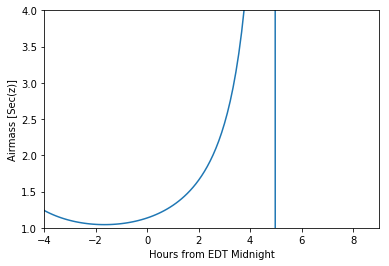

In [98]:
#Similar to above but plots when Moon is high in the Sky
Perth = EarthLocation(lat=-31.9505*u.deg, lon=115.8605*u.deg, height=39*u.m)
utcoffset = 8*u.hour  # Eastern Daylight Time
#time = Time('1985-20-12 23:00:00') + utcoffset
t = Time("2012-5-10 23:55")#+ utcoffset

with solar_system_ephemeris.set('builtin'):
     moon = get_body('moon', t, loc)
midnight = Time('2012-5-10 00:00:00') #+ utcoffset
delta_midnight = np.linspace(-4, 7, 100)*u.hour
moonaltaz = moon.transform_to(AltAz(obstime=midnight+delta_midnight, location=Perth))  

plt.plot(delta_midnight, moonaltaz.secz)  
plt.xlim(-4, 9)  
plt.ylim(1, 4)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Airmass [Sec(z)]')
plt.savefig('moon.pdf')

In [52]:
#Basic moon phase for specific date
import datetime
from astral import Astral
a = Astral()
moon_phase = a.moon_phase(date=datetime.datetime(1985, 12, 20))#date=datetime.datetime.now()
print(moon_phase)

8
